In [6]:
import pandas as pd


In [7]:
predictions_df = pd.read_csv('/Users/tanmaysagarhuria/Downloads/SARIMAX_asks (1).csv') 


In [8]:
df= pd.read_csv('/Users/tanmaysagarhuria/Downloads/filtered_data_mimed0101.csv')

In [9]:
df = pd.concat([df, predictions_df], axis=1)

In [10]:
print(df.head())

  Type  adjusted_time_ints    adjusted_time       Price  Volume  \
0  ask                 0.0  0 days 00:00:00  258.684211     2.0   
1  ask                 1.0  0 days 00:01:00  254.000000     5.0   
2  ask                 2.0  0 days 00:02:00  258.000000     1.0   
3  ask                 3.0  0 days 00:03:00  259.000000     4.0   
4  ask                 4.0  0 days 00:04:00  261.000000     2.0   

   pred_ask_price  
0      259.058784  
1      257.922733  
2      266.827586  
3      280.176471  
4      283.926437  


In [ ]:
df.rename(columns={' ': 'pred_ask_price'}, inplace=True)

In [11]:
df.fillna(method='ffill', inplace=True)

/var/folders/11/mvf3p5t161x6_9by0kd_xglr0000gn/T/ipykernel_60977/4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    df['EMA_fast'] = df['pred_ask_price'].ewm(span=fast_period, adjust=False).mean()
    df['EMA_slow'] = df['pred_ask_price'].ewm(span=slow_period, adjust=False).mean()
    df['MACD'] = df['EMA_fast'] - df['EMA_slow']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()

calculate_macd(df)

In [14]:
df['Buy_Signal'] = (df['MACD'] > df['Signal_Line']) & (df['MACD'].shift(1) <= df['Signal_Line'].shift(1))
df['Sell_Signal'] = (df['MACD'] < df['Signal_Line']) & (df['MACD'].shift(1) >= df['Signal_Line'].shift(1))

In [16]:
initial_capital = 10000.0
capital = initial_capital
shares = 0
portfolio_values = []

# Simulate trading
for index, row in df.iterrows():
    if row['Buy_Signal'] and capital > 0:  # Buy if we have capital and a buy signal
        shares = capital / row['pred_ask_price']
        capital = 0  # All capital is converted into shares
        print(f"Buying at {row['pred_ask_price']} on index {index}")

    if row['Sell_Signal'] and shares > 0:  # Sell if we have shares and a sell signal
        capital = shares * row['pred_ask_price']
        shares = 0  # All shares are sold
        print(f"Selling at {row['pred_ask_price']} on index {index}")

    portfolio_value = capital + (shares * row['pred_ask_price'])
    portfolio_values.append(portfolio_value)

# Final values
final_portfolio_value = capital + (shares * df['pred_ask_price'].iloc[-1]) if shares > 0 else capital
profit = final_portfolio_value - initial_capital

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Profit/Loss: ${profit:.2f}")


Buying at 266.82758620689657 on index 2
Selling at 290.8489240228371 on index 18
Buying at 299.2819499341239 on index 20
Selling at 329.0 on index 36
Buying at 312.8173007026896 on index 64
Selling at 318.14516129032256 on index 75
Buying at 332.2061403508772 on index 76
Selling at 315.8422939 on index 80
Buying at 298.1147666 on index 99
Selling at 322.19172413793103 on index 118
Buying at 294.39943342776206 on index 137
Selling at 333.05227882037536 on index 164
Buying at 309.2838317283325 on index 181
Selling at 300.1071805702218 on index 183
Buying at 313.12486855941114 on index 188
Selling at 322.4559118236473 on index 200
Buying at 342.18558951965065 on index 203
Selling at 329.37221727515583 on index 204
Buying at 304.26974514256875 on index 219
Selling at 322.2605233219568 on index 248
Buying at 282.0380715911442 on index 267
Selling at 311.5309882747069 on index 287
Buying at 276.9411025 on index 305
Selling at 295.3238731218698 on index 334
Buying at 255.4605684547638 on inde

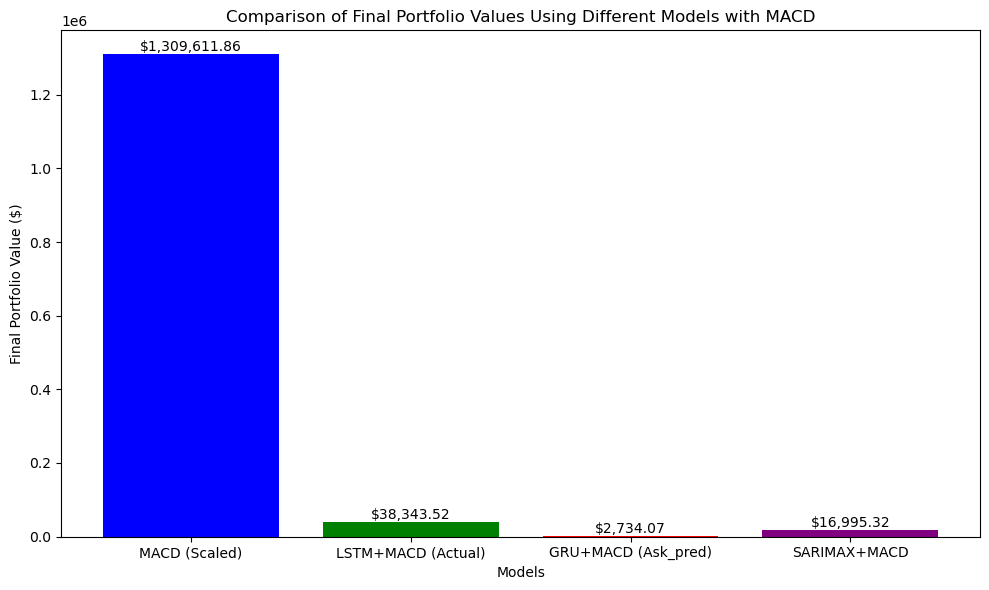

In [17]:
import matplotlib.pyplot as plt

models = ['MACD (Scaled)', 'LSTM+MACD (Actual)', 'GRU+MACD (Ask_pred)', 'SARIMAX+MACD']
values = [1309611.86, 38343.52, 2734.07, 16995.32]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'red', 'purple'])

# Adding title and labels
plt.title('Comparison of Final Portfolio Values Using Different Models with MACD')
plt.xlabel('Models')
plt.ylabel('Final Portfolio Value ($)')

# Adding value labels on top of each bar
for i in range(len(values)):
    plt.text(i, values[i], f'${values[i]:,.2f}', ha = 'center', va = 'bottom')

# Show the plot
plt.tight_layout()
plt.show()